In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

# Load Dataset

In [2]:
df = pd.read_csv("movieReplicationSet.csv")
movies = df.iloc[:, :400]
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


# Q1

In [3]:
# Count the proportion of nan values in movieReplicationSet
sparsity = movies.isna().sum().sum() / (movies.shape[0] * movies.shape[1])
print(f"Proportion of Nan value in movieReplicationSet: {sparsity*100}%")

Proportion of Nan value in movieReplicationSet: 74.42707383773929%


In [4]:
# Median Imputation
for i in range(movies.shape[1]):
    # Calculate the median rating of each movie
    med = np.median(movies.iloc[:, i].dropna())
    
    # Impute Nan
    for j in range(movies.shape[0]):
        if movies.iloc[j, i] != movies.iloc[j, i]:  # Check Nan
            movies.iloc[j, i] = med

In [5]:
from sklearn.linear_model import LinearRegression

# Create an empty list to store CODs
COD_list = []

# Iteratively fit linear models for each movie
for i in range(movies.shape[1]):
    y = movies.iloc[:, [i]]
    for j in range(movies.shape[1]):
        if i != j:
            X = movies.iloc[:, [j]]
            COD_list.append(LinearRegression().fit(X, y).score(X, y))

COD_list = np.array(COD_list).reshape(400, 399)

Avg COD: [0.09749959 0.06079004 0.0290594  0.03857433 0.02854499 0.07394025
 0.02553049 0.04414529 0.0620132  0.0125741  0.02344687 0.0761497
 0.02258532 0.08554865 0.01545334 0.04772601 0.02286497 0.05276054
 0.01976918 0.05467654 0.08376288 0.02977712 0.02890707 0.0419483
 0.04522917 0.08133918 0.03552439 0.06676123 0.07836738 0.02787346
 0.01984426 0.04561619 0.03920815 0.04595805 0.03740487 0.02035186
 0.05077767 0.03012055 0.01921987 0.06280224 0.02417925 0.02100521
 0.04159297 0.06557576 0.04242004 0.09263288 0.0219336  0.02121911
 0.07496906 0.02337941 0.05044256 0.01981706 0.05926729 0.02929365
 0.03902242 0.02155902 0.03652568 0.01546256 0.0544432  0.04863555
 0.03937168 0.10621596 0.0555724  0.03531347 0.04318278 0.02203534
 0.05863564 0.03791905 0.05409751 0.02398615 0.06567802 0.05684042
 0.04081566 0.02365584 0.01530179 0.01436677 0.05408018 0.07767496
 0.05056373 0.0583118  0.00684376 0.03991957 0.02493445 0.03107079
 0.00723642 0.03502015 0.04820569 0.01752833 0.04111126

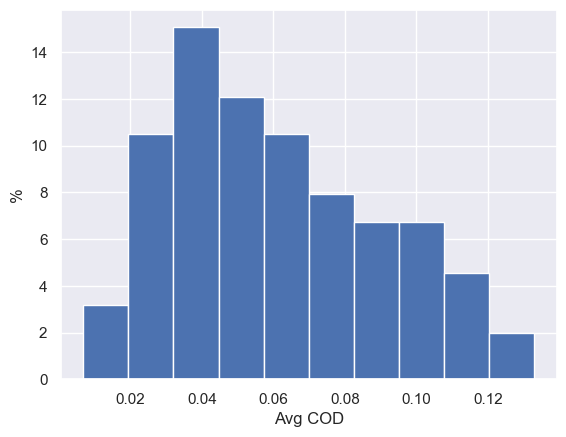

In [6]:
# Mean COD
mean_COD_list = np.mean(COD_list,  axis = 1)
print(f"Avg COD: {mean_COD_list}")

# Plot COD
plt.hist(mean_COD_list, density = True)
plt.xlabel("Avg COD")
plt.ylabel("%")
plt.show()

In [64]:
argmax

'Pulp Fiction (1994)'

In [7]:
# Find top 10 easist and hardest movie to predict and their COD
idx_sort = np.argsort(mean_COD_list)

# For top 10 easy movies
top_ez_name = list(movies.columns[idx_sort[-10:]]) # list for movie titles
top_ez_idx = [list(movies.columns).index(name) for name in top_ez_name]
top_ez_cod = [] # list for mean COD
top_ez_pred = [] # list for predictor titles

for i in range(10):
    tmp = COD_list[idx_sort[-10:]]
    top_ez_cod.append(np.max(tmp[i]))
    argmax = np.argmax(tmp[i])
    if np.argmax(tmp[i]) >= top_ez_idx[i]:
        argmax = argmax + 1
    top_ez_pred.append(movies.columns[argmax])
    
# For top 10 hard movies
top_hard_name = list(movies.columns[idx_sort[:10]]) # list for movie titles
top_hard_idx = [list(movies.columns).index(name) for name in top_hard_name]
top_hard_cod = [] # list for mean COD
top_hard_pred = [] # list for predictor titles

for i in range(10):
    tmp = COD_list[idx_sort[:10]]
    top_hard_cod.append(np.max(tmp[i]))
    argmax = np.argmax(tmp[i])
    if np.argmax(tmp[i]) >= top_hard_idx[i]:
        argmax = argmax + 1
    top_hard_pred.append(movies.columns[argmax])

# Create Final Table
final_table_q1 = pd.DataFrame({
    "Title" : top_ez_name + top_hard_name,
    "Best Predictors": top_ez_pred + top_hard_pred,
    "COD" : top_ez_cod + top_hard_cod
})

In [8]:
final_table_q1

,Title,Best Predictors,COD
0,Billy Jack (1971),Sexy Beast (2000),0.393590
1,The Straight Story (1999),Crimson Tide (1995),0.442016
2,What Lies Beneath (2000),I.Q. (1994),0.396055
3,Boomerang (1992),Sexy Beast (2000),0.366273
4,Crimson Tide (1995),The Straight Story (1999),0.442016
5,Adaption (2002),Andaz Apna Apna (1994),0.366062
6,The Lookout (2007),Patton (1970),0.508363
7,Sexy Beast (2000),The Silencers (1966),0.418203
8,Andaz Apna Apna (1994),De-Lovely (2004),0.422526
9,Escape from LA (1996),The Silencers (1966),0.402586


# Q2

In [9]:
import statistics as stat

# impute df
for i in [474, 475, 476]:
    mode = stat.mode(df.iloc[:, i])
    for j in range(len(df)):
        if df.iloc[j, i] != df.iloc[j, i]: # check nan
            df.iloc[j, i] = mode

best_pred_idx = [list(movies.columns).index(i) for i in final_table_q1["Best Predictors"]] # idx of best predictors of each of 20 movies

reg_list = [] # empty list for multiple regression models

# fit multiple regression models
for i in range(20):
    y = movies[[final_table_q1["Title"][i]]]
    X1 = movies.iloc[:, [best_pred_idx[i]]]
    X2 = pd.get_dummies(df.iloc[:, 474], dtype=float, drop_first=True)
    X3 = pd.get_dummies(df.iloc[:, 475], dtype=float, drop_first=True)
    X4 = pd.get_dummies(df.iloc[:, 476], dtype=float, drop_first=True)
    X = pd.concat([X1, X2, X3, X4], axis = 1).astype(float)
    reg_list.append(LinearRegression().fit(X.to_numpy(), y).score(X.to_numpy(), y))

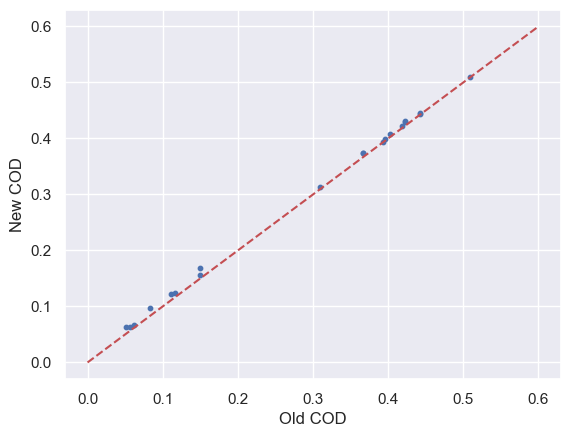

In [10]:
# plot old COD vs new COD
plt.scatter(final_table_q1["COD"], reg_list, s = 10, marker = "o")
plt.plot([0, 0.6], [0, 0.6], "--", c = "r")
plt.xlabel("Old COD")
plt.ylabel("New COD")
plt.show()

# Q3

In [27]:
import random
random.seed(42)

X_idx = []
for i in range(10):
    if i < 5: 
        X_idx.append(random.randint(0, 180))
    else:
        X_idx.append(random.randint(210, 400))
        
X = movies.iloc[:, X_idx]
med_range = idx_sort[180:210]
y_list = movies.iloc[:, med_range]

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_list, test_size=0.2, random_state=42)

alpha_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_list = []
for a in alpha_list:
    ridge_list.append(Ridge(alpha = a).fit(X_train, y_train))

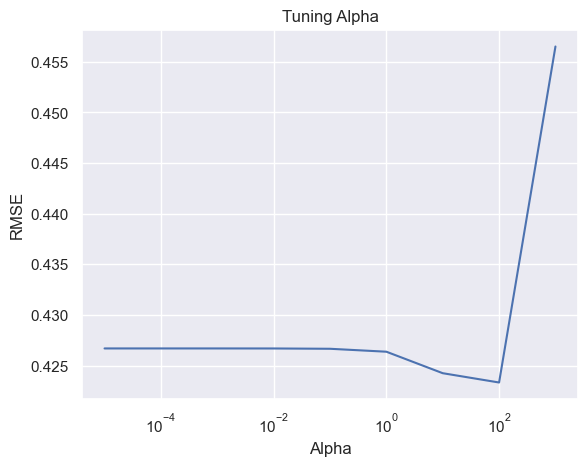

In [29]:
from sklearn.metrics import mean_squared_error

rmse_list = []
for i in range(len(ridge_list)):
    temp = []
    temp.append(mean_squared_error(y_test.to_numpy(), ridge_list[i].predict(X_test))**0.5)
    rmse_list.append(temp)

avg_rmse = [np.mean(i) for i in rmse_list]

plt.title("Tuning Alpha")
plt.plot(alpha_list, avg_rmse)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

In [30]:
final_table_q3 = pd.DataFrame({
    "Title": y_list.columns,
    "RMSE": [mean_squared_error(y_test.to_numpy()[:, i], 
                                ridge_list[alpha_list.index(100)].predict(X_test)[:, i])**0.5 for i in range(30)]
})

final_table_q3

,Title,RMSE
0,Psycho (1960),0.483652
1,Knight and Day (2010),0.424835
2,The Blue Lagoon (1980),0.373512
3,Pulp Fiction (1994),0.599472
4,X-Men 2 (2003),0.537267
5,Gone in Sixty Seconds (2000),0.294302
6,The King of Marvin Gardens (1972),0.210464
7,Groundhog Day (1993),0.464239
8,Good Will Hunting (1997),0.511593
9,Big Daddy (1999),0.337323


In [146]:
avg_rmse = np.mean(final_table_q3["RMSE"])
print(f"Avg RMSE: {avg_rmse}")

Avg RMSE: 0.40936391759508944


In [147]:
ridge_list[alpha_list.index(100)].coef_

array([[ 1.91056274e-01,  2.14950686e-01,  1.87112924e-02,
         1.12305741e-01,  4.08519077e-02,  9.21236067e-02,
         2.52694553e-02,  2.85766079e-02, -2.20148248e-04,
         2.42891407e-02],
       [ 7.12125845e-02,  2.46271646e-02, -1.98597653e-02,
         6.78441606e-02,  1.79723170e-02,  4.79821269e-02,
         1.09625116e-01,  1.05817402e-01,  7.36018877e-02,
         7.15033804e-02],
       [ 9.75105580e-02,  1.57916259e-02,  1.01191326e-02,
         5.89664070e-02,  1.83154601e-02, -1.04476434e-03,
         4.00398674e-02,  5.89932107e-02,  6.87922734e-02,
         7.70338921e-02],
       [ 1.88748563e-01,  1.08882636e-01,  4.01057245e-02,
         7.66896636e-02, -9.16608937e-03,  1.33099435e-01,
         7.54424838e-02,  2.43365735e-02,  1.16866267e-01,
         6.62504026e-02],
       [ 1.48937760e-01,  8.56678809e-02,  5.67369811e-02,
         4.83843580e-02, -1.10005746e-03,  6.87380633e-02,
         1.03464200e-01,  6.35293473e-02,  9.89881799e-02,
         9.

## Q4

In [88]:
import random
random.seed(28)

X_idx = []
for i in range(10):
    if i < 5: 
        X_idx.append(random.randint(0, 180))
    else:
        X_idx.append(random.randint(210, 400))
        
X = movies.iloc[:, X_idx]
med_range = idx_sort[180:210]
y_list = movies.iloc[:, med_range]

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y_list, test_size=0.2, random_state=42)

alpha_list_lasso = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lasso_list = []
for a in alpha_list_lasso:
    lasso_list.append(Lasso(alpha = a).fit(X_train, y_train))

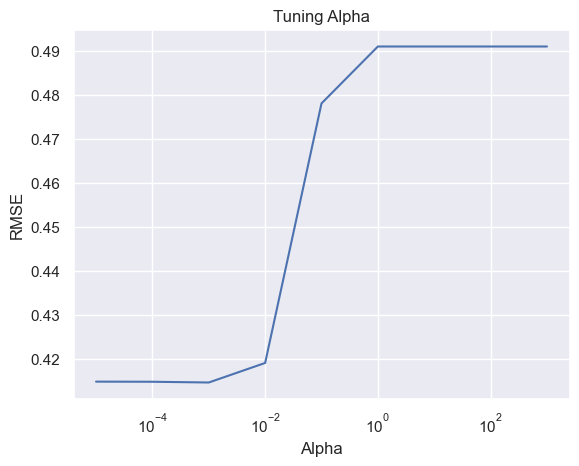

In [90]:
rmse_list_lasso = []
for i in range(len(lasso_list)):
    temp_lasso = []
    temp_lasso.append(mean_squared_error(y_test.to_numpy(), lasso_list[i].predict(X_test))**0.5)
    rmse_list_lasso.append(temp_lasso)

avg_rmse_lasso = [np.mean(i) for i in rmse_list_lasso]

plt.title("Tuning Alpha")
plt.plot(alpha_list_lasso, avg_rmse_lasso)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

In [91]:
# Selecting the best alpha (lowest RMSE)
best_alpha_lasso = alpha_list_lasso[np.argmin(rmse_list_lasso)]
best_alpha_lasso

0.001

In [96]:
best_lasso_model = Lasso(alpha=best_alpha_lasso).fit(X_train, y_train)

# Get the beta coefficients
best_beta_coefficients = best_lasso_model.coef_
print("Best Beta Coefficients:", best_beta_coefficients)

Best Beta Coefficients: [[ 3.34383143e-01  7.82547621e-03 -9.79041717e-03  1.75827062e-01
   2.00453833e-01  9.25915011e-02  9.98708723e-02  6.84426928e-02
  -5.03418065e-02  3.95208108e-02]
 [ 1.43492044e-02  8.00189612e-03  2.16443955e-01  4.10992541e-02
   2.73851057e-02  5.60354623e-02  5.19279035e-02  1.62961243e-01
   3.23945436e-02  2.34922037e-02]
 [-2.51774665e-02 -1.96143216e-03  1.48430946e-01  1.89959011e-01
   1.44206062e-01 -1.86562662e-02  1.58166660e-02  4.03855034e-02
   6.74804691e-02  3.36252652e-02]
 [ 1.07020722e-01  1.68835784e-01  2.78837049e-01  1.53665508e-01
  -1.96501345e-02  1.31369243e-01  1.73173384e-01  1.14096846e-01
   3.06386660e-02  0.00000000e+00]
 [ 1.36459061e-01  8.95028866e-02  9.69395748e-02 -9.25966798e-03
   3.42342851e-02  5.68764908e-02  6.02180314e-02  1.89503918e-01
   9.86881848e-02  7.87240951e-02]
 [ 9.55125022e-02  7.19880539e-02  1.88744544e-01  1.05177811e-01
   2.67158570e-01 -1.20669405e-02 -2.90351085e-03  3.97510438e-03
   4.2670

In [92]:
final_table_q4 = pd.DataFrame({
    "Title": y_list.columns,
    "RMSE": [mean_squared_error(y_test.to_numpy()[:, i], 
                                lasso_list[alpha_list_lasso.index(best_alpha_lasso)].predict(X_test)[:, i])**0.5 for i in range(30)]
})

final_table_q4

,Title,RMSE
0,Psycho (1960),0.481958
1,Knight and Day (2010),0.445743
2,The Blue Lagoon (1980),0.360703
3,Pulp Fiction (1994),0.581583
4,X-Men 2 (2003),0.532539
5,Gone in Sixty Seconds (2000),0.310189
6,The King of Marvin Gardens (1972),0.205658
7,Groundhog Day (1993),0.470546
8,Good Will Hunting (1997),0.501960
9,Big Daddy (1999),0.338402


In [148]:
avg_rmse = np.mean(final_table_q4["RMSE"])
print(f"Avg RMSE: {avg_rmse}")

Avg RMSE: 0.39629882159546154


## Q5

In [132]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# compute the Average Movie Enjoyment for Each User
user_avg_ratings = df.iloc[:, :400].mean(axis=1)
# sort the movies
sorted_movies = df.iloc[:, :400].mean().sort_values().index
target_movies = sorted_movies[198:202]  # Select the 4 movies in the middle
target_movies

Index(['Fahrenheit 9/11 (2004)', 'Happy Gilmore (1996)',
       'Diamonds are Forever (1971)', 'Scream (1996)'],
      dtype='object')

In [133]:
user_avg_ratings[user_avg_ratings.isna() == True]

896   NaN
dtype: float64

In [134]:
user_avg_ratings = user_avg_ratings.dropna()

In [139]:
movies = movies.drop(896)

In [140]:
# perform median split on imputed ratings for each target movie
for movie in target_movies:
    # use imputed data
    ratings = movies[movie]
    
    # perform median split
    median_rating = ratings.median()
    movies[movie + '_label'] = (ratings >= median_rating).astype(int)
movies

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Fahrenheit 9/11 (2004)_label,Happy Gilmore (1996)_label,Diamonds are Forever (1971)_label,Scream (1996)_label
0,2.5,2.0,4.0,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,0.5,2.5,2.5,2.5,2.0,2.5,1,1,1,1
1,2.5,2.0,1.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,4.0,2.5,2.5,2.5,2.0,2.5,1,1,1,1
2,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.5,2.5,2.5,2.5,2.0,2.5,1,1,1,1
3,2.5,2.0,2.0,3.0,3.0,3.0,2.5,3.0,2.5,4.0,...,2.5,2.5,2.5,2.5,2.0,2.5,1,1,1,1
4,2.5,2.0,3.5,3.0,0.5,3.0,0.5,1.0,2.5,0.0,...,3.5,2.5,2.5,1.5,2.0,2.5,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.5,2.0,3.5,3.0,3.5,3.0,2.5,3.0,2.5,3.0,...,4.0,2.5,2.5,2.5,2.0,2.5,1,1,1,1
1093,3.0,4.0,3.5,3.0,4.0,4.0,2.5,3.0,3.5,3.5,...,3.5,4.0,3.5,4.0,4.0,4.0,1,1,1,1
1094,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.5,2.5,3.0,...,4.0,2.5,2.5,2.5,2.0,2.5,1,1,1,1
1095,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,2.5,2.5,2.5,2.5,2.0,2.5,1,1,1,1



Movie: Fahrenheit 9/11 (2004)
Beta Coefficients: [1.08743473]

Movie: Happy Gilmore (1996)
Beta Coefficients: [0.69117847]

Movie: Diamonds are Forever (1971)
Beta Coefficients: [0.95141303]

Movie: Scream (1996)
Beta Coefficients: [0.68184129]


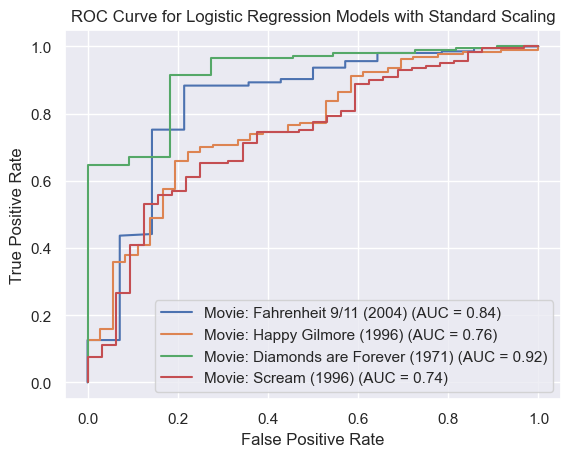

In [141]:
from sklearn.metrics import roc_curve, auc
for movie in target_movies:
    X = user_avg_ratings.values.reshape(-1,1)
    y = movies[movie + '_label']

    # split data for cross-validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build logistic regression model
    model = LogisticRegression()

    # Fit the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Predict on the scaled test set
    y_pred = model.predict_proba(X_test_scaled)[:, 1]

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'Movie: {movie} (AUC = {roc_auc_score(y_test, y_pred):.2f})')

    # Print beta coefficients
    print(f'\nMovie: {movie}')
    print('Beta Coefficients:', model.coef_[0])

# Show the ROC curve
plt.title('ROC Curve for Logistic Regression Models with Standard Scaling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Extra

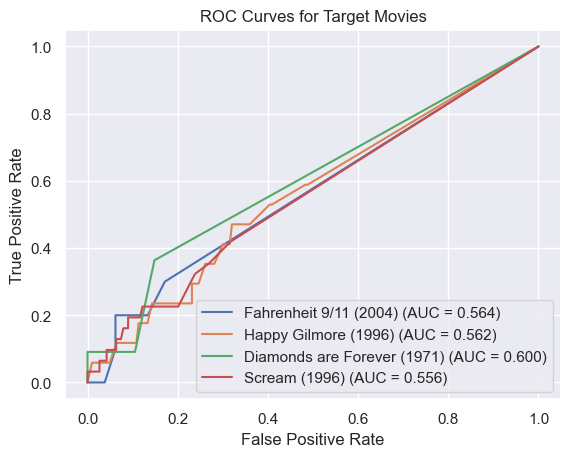

                                  AUC
Fahrenheit 9/11 (2004)       0.563571
Happy Gilmore (1996)         0.562446
Diamonds are Forever (1971)  0.600043
Scream (1996)                0.555641


In [149]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Sort movies based on the real, non-imputed data
sorted_movies = df.iloc[:, :400].mean().sort_values().index

# Pick the 4 movies in the middle of the score range
target_movies = sorted_movies[198:202]

# Create a DataFrame for the Random Forest results
rf_results = pd.DataFrame(index=target_movies)

# Build a Random Forest model for each target movie
for movie in target_movies:
    # Extract features (X) and target variable (y)
    X = user_avg_ratings.values.reshape(-1, 1)
    y = (movies[movie] > movies[movie].median()).astype(int)

    # Split data for cross-validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict probabilities for ROC curve
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    # Save results to rf_results DataFrame
    rf_results.loc[movie, 'AUC'] = auc

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{movie} (AUC = {auc:.3f})')

# Set labels and title for the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Target Movies')
plt.legend()
plt.show()

# Display the results
print(rf_results)